# Artificial Intelligence

## 1. Data pre-processing Step

### Importing Libraries

In [ ]:
pip install numpy==1.21.4

In [ ]:
pip install threadpoolctl==3.1.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
data = pd.read_csv('Mall_Customers.csv')

In [48]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


In [49]:
data.shape

(200, 5)

In [50]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,192.000000,200.000000
mean,100.500000,38.850000,59.848958,50.200000
std,57.879185,13.969007,26.538781,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,40.000000,34.750000
50%,100.500000,36.000000,60.000000,50.000000
75%,150.250000,49.000000,77.250000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      192 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [52]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40
...,...,...,...,...,...
195,196,Female,35,120.0,79
196,197,Female,45,126.0,28
197,198,Male,32,126.0,74
198,199,Male,32,137.0,18


In [53]:
income = data['Annual Income (k$)']

In [54]:
income_mean = income.mean()
income_mean

59.848958333333336

In [55]:
income.fillna(income_mean, inplace=True)

In [56]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Extracting Independent Variables

In [57]:
x = data.iloc[:, [3, 4]].values

In [58]:
x

array([[ 15.        ,  39.        ],
       [ 15.        ,  81.        ],
       [ 16.        ,   6.        ],
       [ 16.        ,  77.        ],
       [ 17.        ,  40.        ],
       [ 17.        ,  76.        ],
       [ 18.        ,   6.        ],
       [ 18.        ,  94.        ],
       [ 19.        ,   3.        ],
       [ 19.        ,  72.        ],
       [ 19.        ,  14.        ],
       [ 19.        ,  99.        ],
       [ 20.        ,  15.        ],
       [ 20.        ,  77.        ],
       [ 20.        ,  13.        ],
       [ 20.        ,  79.        ],
       [ 21.        ,  35.        ],
       [ 21.        ,  66.        ],
       [ 23.        ,  29.        ],
       [ 23.        ,  98.        ],
       [ 24.        ,  35.        ],
       [ 24.        ,  73.        ],
       [ 25.        ,   5.        ],
       [ 25.        ,  73.        ],
       [ 28.        ,  14.        ],
       [ 28.        ,  82.        ],
       [ 28.        ,  32.        ],
 

## 2. Finding the optimal number of clusters using the elbow method

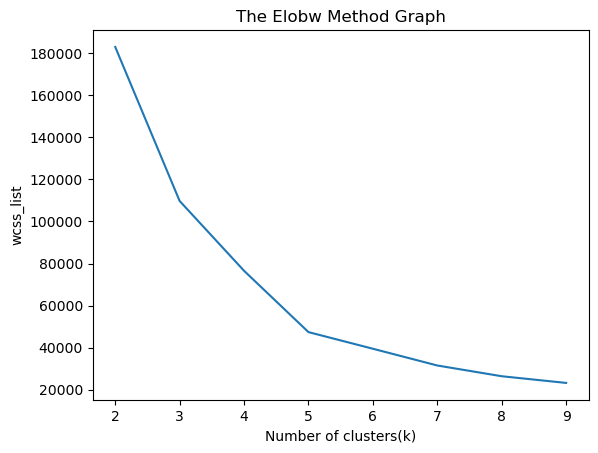

In [64]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= [] #Initializing the list for the values of WCSS

#Using for loop for iterations from 2 to 9.
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [65]:
wcss_list

[183045.06686623133,
 109762.11386719259,
 76553.3282909146,
 47377.45588328685,
 39465.986554422845,
 31496.801320798637,
 26388.67647832004,
 23205.71503466143]

## 3. Training the K-means algorithm on the training set

In [66]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

In [67]:
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 0, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## 4. Visualizing the Clusters

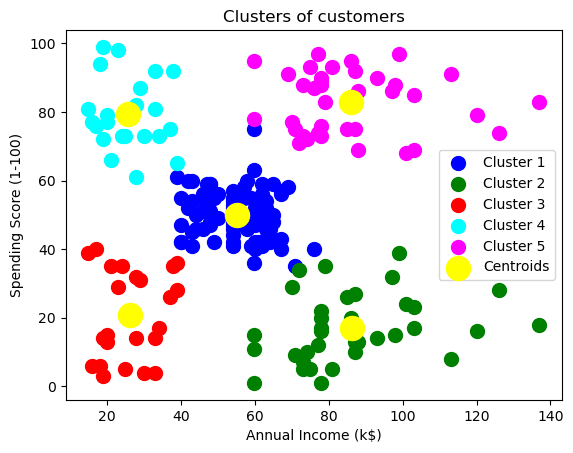

In [68]:
#visulaizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Finish